___
## Ciência dos Dados - PROJETO 3 - INSPER

___
### Feito por: Theo Barbara, Abel Cavalcante, Gustavo Pierre e Victor Jurdi
___

# Wines Review

___

## A. INTRODUÇÃO

Para o Projeto 3 de Ciências dos Dados, o grupo escolheu trabalhar com vinhos. O nosso DataSet contém 10 variavéis(Pais de origem,descrição do vinho,designação, pontos na avaliação, preço, provincia, região, variedade e a adega produtora. Com isso nosso grupo procura prever o preço do vinho através das variavéis mais qualificadas, que serão, o país, os pontos (nota do vinho) e o tipo da uva.

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [2]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from operator import itemgetter

### BASE DE DADOS

In [3]:
x=pd.read_csv('winemag-data_first150k.csv')
del x["Unnamed: 0"]
x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
dic = {}
for e in x.variety:
    if e not in dic:
        dic[e] = 1
    
        
    elif e in dic:
        dic[e] +=1

lista = []
for e in dic:
    if dic[e] > 0:
        lista.append(dic[e]/len(dic))
        
dic2 = {}
i=0
for e in x.variety:
    if e not in dic2:
        dic2[e] = 1
        
i=0
for e in dic2:
    dic2[e] = lista[i]
    i+=1
    
lista2=[]
for uva in x.variety:
    lista2.append(dic2[uva])
    
x["Frequencia"] = lista2

x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Frequencia
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,20.253165
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,0.349684
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,10.000000
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,22.612342
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,0.039557


In [5]:
novo_x=x[x.Frequencia>0.5]

novo_x.loc[(novo_x.price<50),'Preço'] = 'Até 50'
novo_x.loc[(novo_x.price>50)&(novo_x.price<=200),'Preço'] = 'Até 200'
novo_x.loc[(novo_x.price>200)&(novo_x.price<=400),'Preço'] = 'Até 400'
novo_x.loc[(novo_x.price>400)&(novo_x.price<=600),'Preço'] = 'Até 600'
novo_x.loc[(novo_x.price>600)&(novo_x.price<=800),'Preço'] = 'Até 800'
novo_x.loc[(novo_x.price>800)&(novo_x.price<=1000),'Preço'] = 'Até 1000'
novo_x.loc[(novo_x.price>1000)&(novo_x.price<=1500),'Preço'] = 'Até 1500'
novo_x.loc[(novo_x.price>2000),'Preço'] = 'Mais que 2000'

novo_x.loc[(novo_x.points<=80),'Pontos'] = '80 pontos'
novo_x.loc[(novo_x.points>80)&(novo_x.points<=85),'Pontos'] = '81 - 85 pontos'
novo_x.loc[(novo_x.points>85)&(novo_x.points<=90),'Pontos'] = '86 - 90 pontos'
novo_x.loc[(novo_x.points>90)&(novo_x.points<=95),'Pontos'] = '91 - 95 pontos'
novo_x.loc[(novo_x.points>95)&(novo_x.points<=100),'Pontos'] = '95 - 100 pontos'

novo_x.head()

C:\Users\victo\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\victo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,country,description,designation,points,price,province,region_1,region_2,variety,winery,Frequencia,Preço,Pontos
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,20.253165,Até 400,95 - 100 pontos
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,10.000000,Até 200,95 - 100 pontos
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,22.612342,Até 200,95 - 100 pontos
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,22.612342,Até 200,91 - 95 pontos
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,22.612342,Até 200,91 - 95 pontos


### ANÁLISE DESCRITIVA

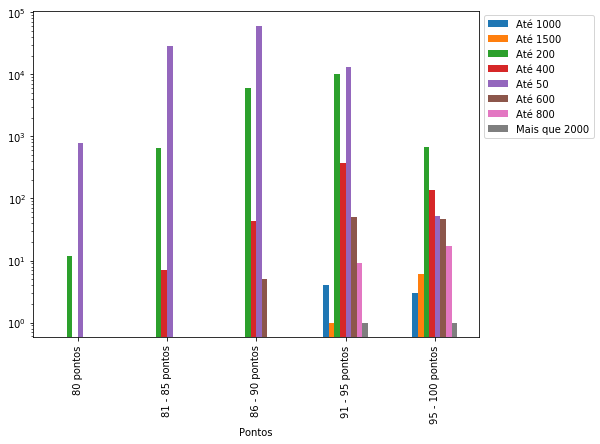

In [6]:
data = pd.crosstab(novo_x.Pontos, novo_x.Preço)
data.plot(kind='bar', figsize=(8,6));
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8));

In [7]:
novo_x.points.corr(novo_x.price)

0.4600421512441059

In [8]:
novo_x.Frequencia.corr(novo_x.price)

0.11149984361374775

In [9]:
novo_x.Frequencia.corr(novo_x.points)

0.06969229048694064

In [10]:
#plt.hist(novo_x["country"]);

In [11]:
#plt.hist(novo_x["Preço"]);

In [12]:
#plt.hist(novo_x.Pontos);

In [13]:
#plt.figure(figsize = (10, 10))
#sns.heatmap(novo_x.corr(), linewidth=0.5)
#plt.show()

In [33]:
novo_x.price.dropna()

0         235.0
2          90.0
3          65.0
8          65.0
9          60.0
11         48.0
12         48.0
14        185.0
15         90.0
16        325.0
17         80.0
18        290.0
19         75.0
20         24.0
21         79.0
23         60.0
24         45.0
25         57.0
26         62.0
27        105.0
28         60.0
29         60.0
31         37.0
33         22.0
34         42.0
35        135.0
36         60.0
37         29.0
38         23.0
39         29.0
          ...  
150898      7.0
150899     15.0
150900     13.0
150901     12.0
150902     10.0
150903      7.0
150904     10.0
150905     13.0
150906     65.0
150907     52.0
150908     65.0
150909     52.0
150910     38.0
150911     37.0
150912     65.0
150913     30.0
150915     30.0
150916     65.0
150917     30.0
150918     38.0
150919     37.0
150920     19.0
150921     38.0
150923     30.0
150924     70.0
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 124

___
## C. MODELOS DE PREDIÇÃO

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

In [57]:
seed = 569

X_train, X_test, y_train, y_test = train_test_split(novo_x, novo_x.price, random_state = seed)

X_train

media_price = np.mean(X_train.price)
print('O preço predito foi $ {0}'.format(media_price))



O preço predito foi $ 33.675862587386305


o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

In [15]:
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

C:\Users\victo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [50]:
dummy_variety = pd.get_dummies(novo_x['variety'])


dummy_variety.head()

,Aglianico,Albariño,Barbera,Bordeaux-style Red Blend,Bordeaux-style White Blend,Cabernet Franc,Cabernet Sauvignon,Carmenère,Champagne Blend,Chardonnay,...,Sauvignon Blanc,Shiraz,Sparkling Blend,Syrah,Tempranillo,Tempranillo Blend,Torrontés,Viognier,White Blend,Zinfandel
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
novo_x = pd.concat([novo_x,dummy_variety],axis=1)



novo_x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,...,Sauvignon Blanc,Shiraz,Sparkling Blend,Syrah,Tempranillo,Tempranillo Blend,Torrontés,Viognier,White Blend,Zinfandel
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,...,0,0,0,0,0,0,0,0,0,0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,...,1,0,0,0,0,0,0,0,0,0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,...,0,0,0,0,0,0,0,0,0,0
8,US,This re-named vineyard was formerly bottled as...,Silice,95.0,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,...,0,0,0,0,0,0,0,0,0,0
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95.0,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,...,0,0,0,0,0,0,0,0,0,0


In [19]:
novo_x.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery', 'Frequencia', 'Preço',
       'Pontos', 'Aglianico', 'Albariño', 'Barbera',
       'Bordeaux-style Red Blend', 'Bordeaux-style White Blend',
       'Cabernet Franc', 'Cabernet Sauvignon', 'Carmenère', 'Champagne Blend',
       'Chardonnay', 'Chenin Blanc', 'Corvina, Rondinella, Molinara',
       'Dolcetto', 'Gamay', 'Garganega', 'Garnacha', 'Gewürztraminer', 'Glera',
       'Grenache', 'Grüner Veltliner', 'Malbec', 'Meritage', 'Merlot',
       'Montepulciano', 'Moscato', 'Nebbiolo', 'Nero d'Avola', 'Petite Sirah',
       'Pinot Blanc', 'Pinot Grigio', 'Pinot Gris', 'Pinot Noir', 'Port',
       'Portuguese Red', 'Portuguese White', 'Prosecco', 'Red Blend',
       'Rhône-style Red Blend', 'Rhône-style White Blend', 'Riesling', 'Rosé',
       'Sangiovese', 'Sangiovese Grosso', 'Sauvignon Blanc', 'Shiraz',
       'Sparkling Blend', 'Syrah', 'Tempranillo', 'Temp

In [20]:
novo_x = novo_x.dropna(subset=['price'])
novo_x.shape

(124172, 66)

In [21]:
X = novo_x[['points','Aglianico','Albariño','Barbera','Bordeaux-style Red Blend','Bordeaux-style White Blend','Cabernet Franc','Cabernet Sauvignon','Carmenère','Champagne Blend','Chardonnay','Chenin Blanc','Corvina, Rondinella, Molinara','Dolcetto', 'Gamay', 'Garganega', 'Garnacha', 'Gewürztraminer', 'Glera','Grenache', 'Grüner Veltliner', 'Malbec', 'Meritage', 'Merlot','Montepulciano', 'Moscato', 'Nebbiolo', "Nero d'Avola", 'Petite Sirah','Pinot Blanc', 'Pinot Grigio', 'Pinot Gris', 'Pinot Noir', 'Port','Portuguese Red', 'Portuguese White', 'Prosecco', 'Red Blend','Rhône-style Red Blend', 'Rhône-style White Blend', 'Riesling', 'Rosé','Sangiovese', 'Sangiovese Grosso', 'Sauvignon Blanc', 'Shiraz','Sparkling Blend', 'Syrah', 'Tempranillo', 'Tempranillo Blend','Torrontés', 'Viognier', 'White Blend', 'Zinfandel']]

In [22]:
Y = novo_x['price']

In [23]:
results3 = regress(X, Y)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     788.9
Date:                Thu, 23 May 2019   Prob (F-statistic):               0.00
Time:                        15:35:02   Log-Likelihood:            -6.0657e+05
No. Observations:              124172   AIC:                         1.213e+06
Df Residuals:                  124118   BIC:                         1.214e+06
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -388.3430      2.506   -154.968      0.000    -393.255    -383.431
points                            4.8577      0.029    166.960      0.000       4.801       4.915
Aglianico                        -9.2288      1.960     -4.709      0.000     -13.070      -5.388
Albariño                        -15.9440      1.374    -11.604      0.000     -18.637     -13.251
Barbera                          -9.9028      1.023     -9.681      0.000     -11.908      -7.898
Bordeaux-style Red Blend          5.9562      0.498     11.953      0.000       4.980       6.933
Bordeaux-style White Blend       -1.7947      1.315     -1.365      0.172      -4.372       0.782
Cabernet Franc                   -4.0208      0.883     -4.554      0.000      -5.751      -2.290
Cabernet Sauvignon                2.6488      0.325      8.143      0.000       2.011       3.286
Carmenère                       -10.1634      1.161     -8.756      0.000     -12.438      -7.888
Champagne Blend                  30.8953      1.010     30.585      0.000      28.915      32.875
Chardonnay                       -5.3956      0.314    -17.206      0.000      -6.010      -4.781
Chenin Blanc                    -18.0728      1.254    -14.414      0.000     -20.530     -15.615
Corvina, Rondinella, Molinara     2.9444      0.892      3.302      0.001       1.196       4.692
Dolcetto                        -11.8000      1.731     -6.816      0.000     -15.193      -8.407
Gamay                           -17.8227      1.824     -9.772      0.000     -21.397     -14.248
Garganega                       -15.2994      1.800     -8.500      0.000     -18.827     -11.771
Garnacha                        -10.8235      1.584     -6.831      0.000     -13.929      -7.718
Gewürztraminer                  -13.1402      1.065    -12.336      0.000     -15.228     -11.052
Glera                           -13.4959      1.444     -9.347      0.000     -16.326     -10.666
Grenache                         -5.3399      1.297     -4.117      0.000      -7.882      -2.798
Grüner Veltliner                -16.3798      1.098    -14.922      0.000     -18.531     -14.228
Malbec                          -10.1895      0.588    -17.332      0.000     -11.342      -9.037
Meritage                         -0.1205      1.772     -0.068      0.946      -3.593       3.352
Merlot                           -4.4678      0.471     -9.476      0.000      -5.392      -3.544
Montepulciano                   -11.1113      1.912     -5.812      0.000     -14.858      -7.364
Moscato                         -13.0394      1.600     -8.148      0.000     -16.176      -9.903
Nebbiolo                         15.9137      0.828     19.216      0.000      14.291      17.537
Nero d'Avola                    -13.6202     

Como podemos analisar nos dados da regressão, o $P > |t|$ para as variáveis 'Bordeaux-style White Blend' , 'Meritage' e 'Tempranillo Blend' não são tão baixas, o que não nos permite rejeitar a hipótese nula, portanto seus betas são zero. Já para a probabilidade das variáveis restantes, podemos afirmar que se rejeita a hipótese nula, portanto seus respectivos betas são maiores que zero, considerando que as suas probabilidades foram baixas ou nulas.

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

In [55]:
z=0
for e in y_train:

    r= (e - media_price)**2
    z+=r
z
    
RMS_train=(z/len(y_train))**(1/2)

b=0
for e in y_test:

    rm= (e - media_price)**2
    b+=rm
b


RMS_test = (b/len(y_test))**(1/2)

print(RMS_test)
print(RMS_train)
    

38.2570032785192
36.58151231903599


___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/